In [40]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Titanic dataset. Replace 'titanic.csv' with your own dataset file for your project.
# Ensure the dataset file exists and is in the same directory as this jupyter notebook.
df = pd.read_csv('cars.csv')

# Display the first few rows of the dataframe to ensure it is loaded correctly
display(df.columns)
display(df.head())

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


Question 1:

What are the Top 5 Companies possessing the most car models in the dataset?

Company Names
Nissan        149
Volkswagen    109
Porsche        96
Mazda          87
Mitsubishi     60
Name: count, dtype: int64

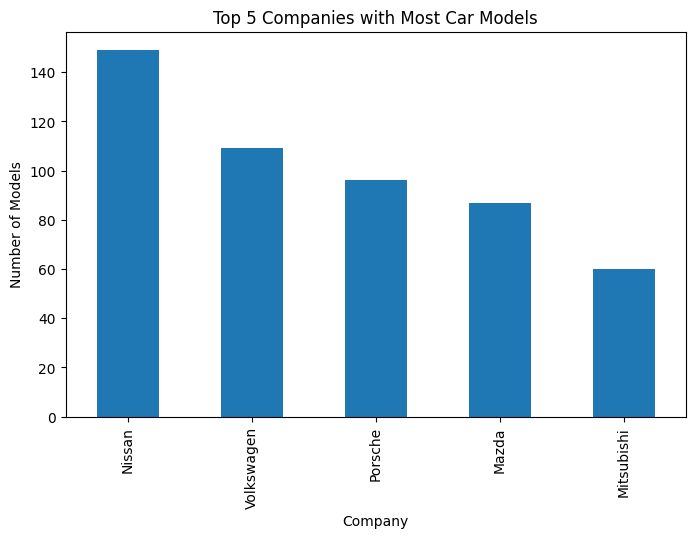

In [41]:

mostcars_top5 = df['Company Names'].value_counts().head(5)

display(mostcars_top5)

#Visualization

plt.figure(figsize=(8,5))
mostcars_top5.plot(kind='bar')
plt.xlabel("Company")
plt.ylabel("Number of Models")
plt.title("Top 5 Companies with Most Car Models")
plt.show()


Question 2

What is the average horsepower for each fuel type



Fuel Types
CNG/Petrol                  86.000000
Diesel                     227.136792
Diesel Hybrid              150.000000
Diesel/Petrol              111.625000
Electric                   366.411111
Gas / Hybrid                      NaN
Hybrid                     320.089744
Hybrid (Gas + Electric)    240.000000
Hybrid (Petrol)            567.500000
Hybrid / Plug-in                  NaN
Hybrid/Electric            139.000000
Hybrid/Petrol              220.500000
Hydrogen                   154.666667
Petrol                     311.680253
Petrol (Hybrid)                   NaN
Petrol, Diesel             225.500000
Petrol, Hybrid             187.000000
Petrol/AWD                 213.500000
Petrol/Diesel              220.875000
Petrol/EV                  147.000000
Petrol/Hybrid              190.968750
Plug-in Hybrid             265.600000
plug in hyrbrid            963.000000
Name: HorsePower, dtype: float64

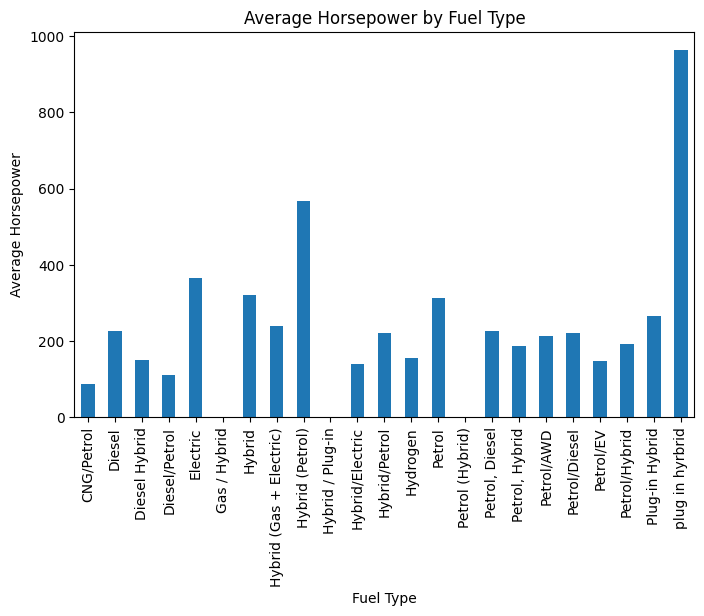

In [42]:
def cleaner(value):
    value = str(value).strip().lower()
    
    if value in ['nan', 'none', '']:
        return np.nan
    
    #Replacing empty string or special characters for value to be extracted
    value = value.replace('$', '').replace(',', '').replace(' hp', '').replace(' cc', '')
    
    if any(sep in value for sep in ['-', '/']):
        for sep in ['-', '/']:
            if sep in value:
                parts = value.split(sep)
                try:
                    low = float(parts[0])
                    high = float(parts[1])
                    return (low + high) / 2
                except (ValueError, IndexError):
                    return np.nan
    
    try:
        return float(value)
    except ValueError:
        return np.nan 
    
    # Handle regular numeric values
    try:
        return float(value)
    except (ValueError, TypeError):
        # Return NaN for any other invalid strings
        return np.nan

df['HorsePower'] = df['HorsePower'].apply(cleaner)


average_hp_fuel = df.groupby('Fuel Types')['HorsePower'].mean()

display(average_hp_fuel)

#Visualization

plt.figure(figsize=(8,5))
average_hp_fuel.plot(kind='bar')
plt.xlabel("Fuel Type")
plt.ylabel("Average Horsepower")
plt.title("Average Horsepower by Fuel Type")
plt.show()


Question 3

What is the most expensive car in the dataset, and what are its specifications?

Company Names                            Bugatti
Cars Names                      La Voiture Noire
Engines                      8.0L Quad-Turbo W16
CC/Battery Capacity                      7993 cc
HorsePower                                1500.0
Total Speed                             420 km/h
Performance(0 - 100 )KM/H                2.5 sec
Cars Prices                           18000000.0
Fuel Types                                Petrol
Seats                                          2
Torque                                   1600 Nm
Name: 887, dtype: object


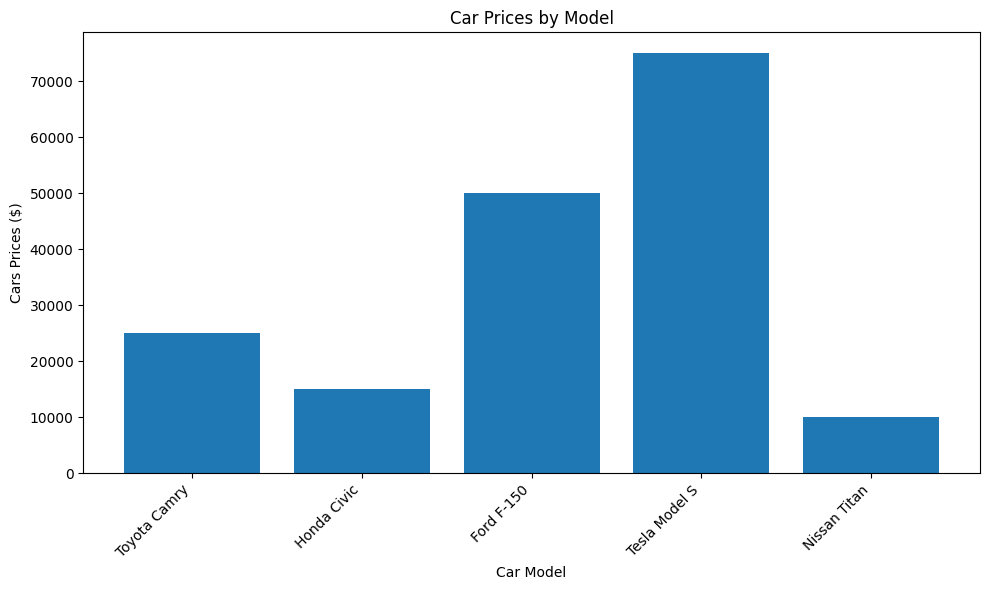

In [43]:

# Clean the 'Cars Prices' column by removing '$', ',', and then use the function
df['Cars Prices'] = df['Cars Prices'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).apply(cleaner)

most_expensive_car_index = df['Cars Prices'].idxmax()
most_expensive_car = df.loc[most_expensive_car_index]

print(most_expensive_car)

#Visualization

data = {'Cars Prices': ['$25,000', '$15,000', '$50,000', '$75,000', '$10,000'],
        'Car Model': ['Toyota Camry', 'Honda Civic', 'Ford F-150', 'Tesla Model S', 'Nissan Titan'],
        'Year': [2020, 2019, 2021, 2022, 2018]}
df = pd.DataFrame(data)

df['Cars Prices'] = df['Cars Prices'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

plt.figure(figsize=(10, 6))
plt.bar(df['Car Model'], df['Cars Prices'])
plt.xlabel('Car Model')
plt.ylabel('Cars Prices ($)')
plt.title('Car Prices by Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



Question 4

How many cars are electric or hybrid, and what is their average 0-100 km/h acceleration?

In [45]:

# Use the same removecharacter function to clean the column
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(cleaner)

ev_hybrid_cars = df[df['Fuel Types'].str.contains('electric|hybrid', case=False, na=False)]
num_ev_hybrid = len(ev_hybrid_cars)
avg_accel = ev_hybrid_cars['Performance(0 - 100 )KM/H'].mean()

print(f"Number of electric/hybrid cars: {num_ev_hybrid}")
print(f"Average 0-100 km/h acceleration: {avg_accel:.2f} seconds")

KeyError: 'Performance(0 - 100 )KM/H'

Question 5

Average Car Price per Company

In [ ]:

# Clean the 'Cars Prices' column
df['Cars Prices'] = df['Cars Prices'].apply(removeweirdcharacters)

# Calculate the average price by company
average_price_by_company = df.groupby('Company Names')['Cars Prices'].mean()

print(average_price_by_company)

NameError: name 'removeweirdcharacters' is not defined

Question 6

What are the top fastest accelerating cars (based on mph)

In [ ]:
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(cleaner)
fastest_cars = df.sort_values(by='Performance(0 - 100 )KM/H').head(3)
display(fastest_cars[['Company Names', 'Cars Names', 'Performance(0 - 100 )KM/H']])


,Company Names,Cars Names,Performance(0 - 100 )KM/H
554,Porsche,911 Turbo S,2.6
553,Porsche,911 Turbo,2.7
561,Porsche,Taycan Turbo S,2.8


Question 7

Horsepower to Price Comparison

In [ ]:
df['HorsePower'] = df['HorsePower'].apply(cleaner)
df['Cars Prices'] = df['Cars Prices'].apply(cleaner)
correlation = df[['HorsePower', 'Cars Prices']].corr()
display(correlation)

,HorsePower,Cars Prices
HorsePower,1.000000,0.516437
Cars Prices,0.516437,1.000000


Question 8

What is the distribution of Seats across all car models?


In [ ]:
df['Seats'] = df['Seats'].apply(cleaner)
seating_distribution = df['Seats'].value_counts()
display(seating_distribution)

Seats
5.0     692
4.0     161
7.0     147
2.0     136
8.0      29
6.0      20
3.0      14
1.0       3
20.0      1
15.0      1
12.0      1
9.0       1
Name: count, dtype: int64

Question 9

Which Car Name has the highest Speed for each Company?

Question 10

What are the three most common Engine types in the dataset?

In [ ]:
top_3_engines = df['Engines'].value_counts().head(3)
display(top_3_engines)

Engines
I4     64
V12    51
V6     39
Name: count, dtype: int64